In [78]:
import numpy as np
from tqdm.auto import tqdm
from scipy.signal import resample
import matplotlib.pyplot as plt

import heartpy as hp
from heartpy.datautils import rolling_mean
from heartpy.peakdetection import detect_peaks
import math
import scipy

In [3]:
x = np.load('/usr/xtmp/zg78/stanford_dataset/testx_accpt_clean.npy')

In [71]:
limiter = 20
trigger_length = 200
trigger_weight = 0.6

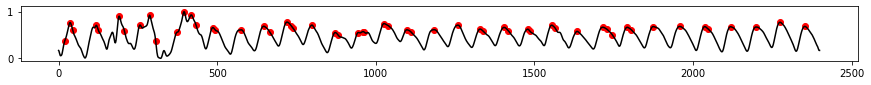

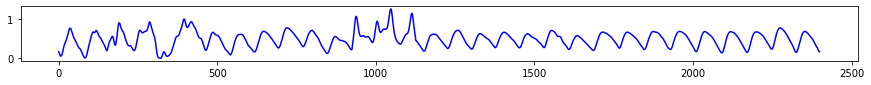

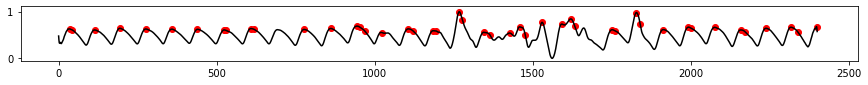

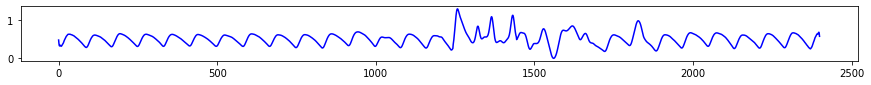

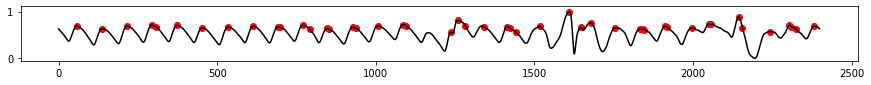

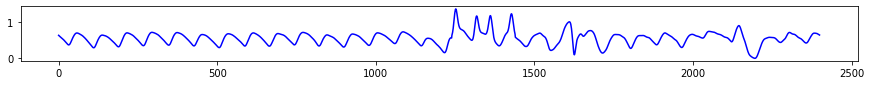

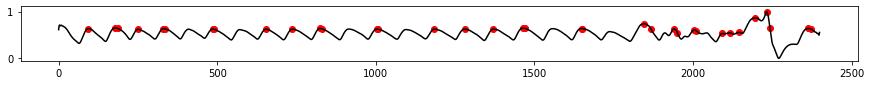

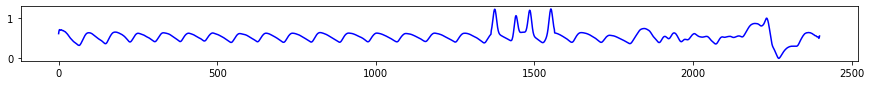

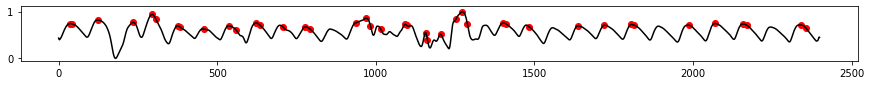

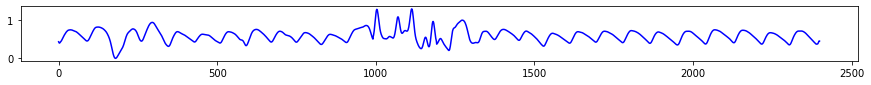

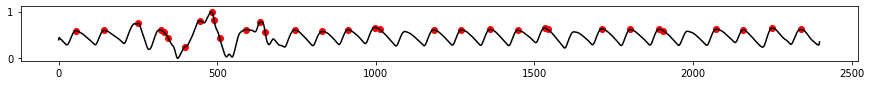

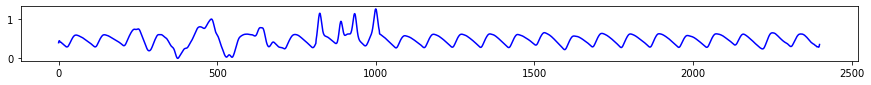

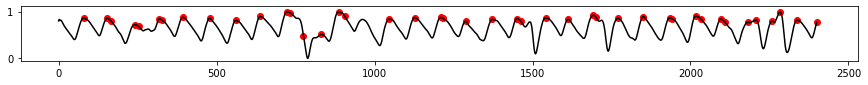

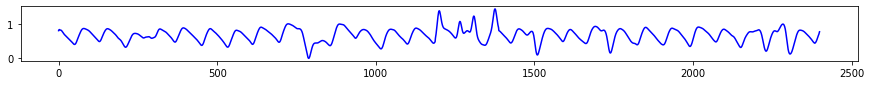

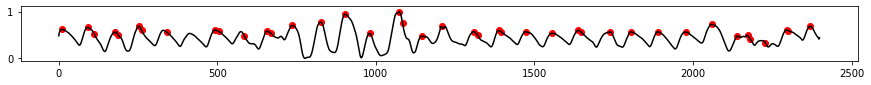

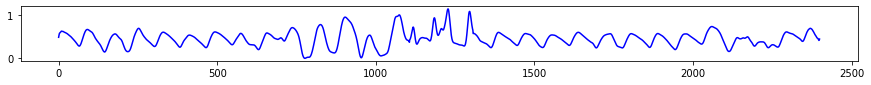

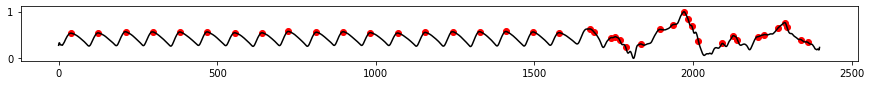

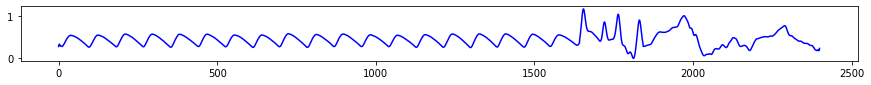

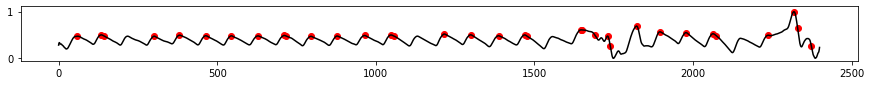

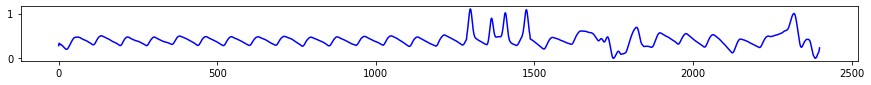

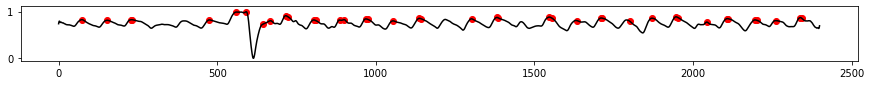

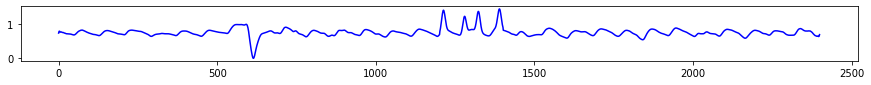

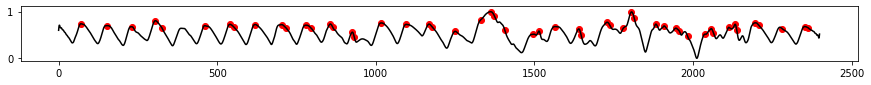

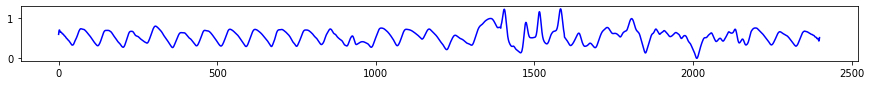

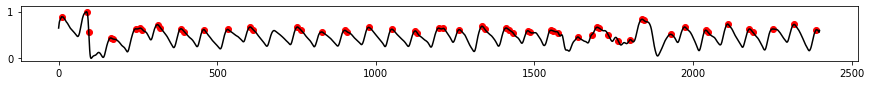

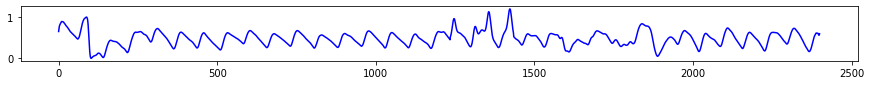

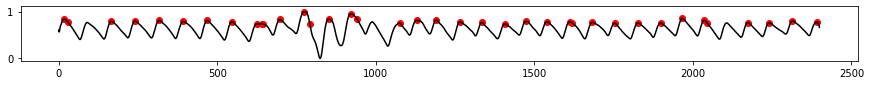

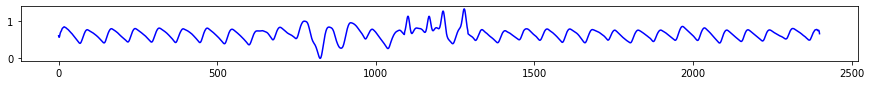

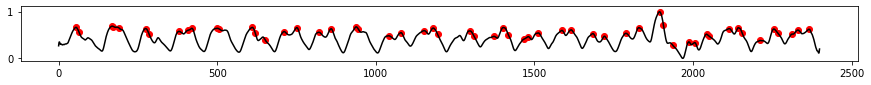

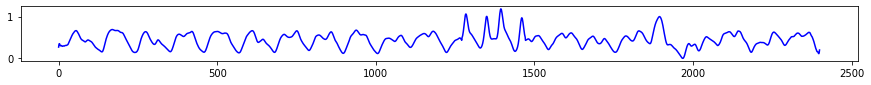

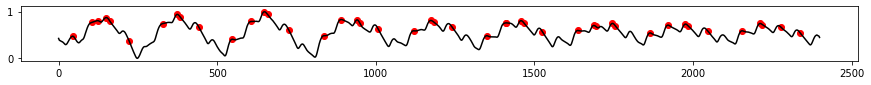

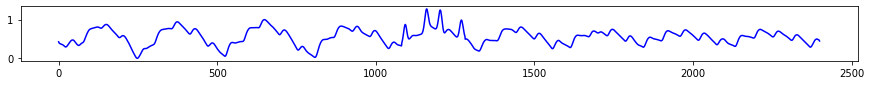

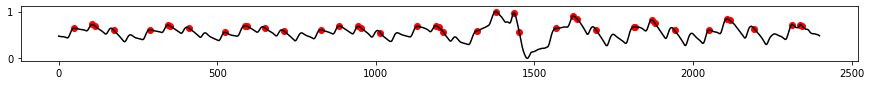

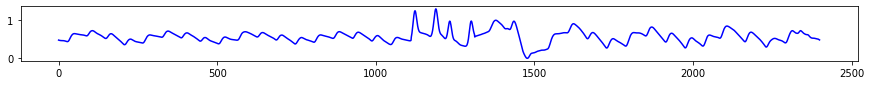

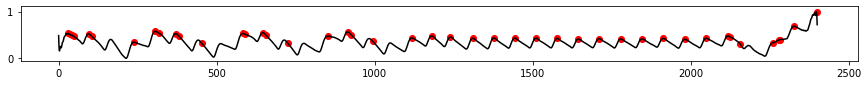

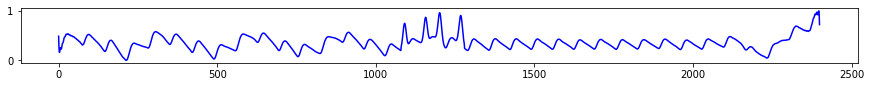

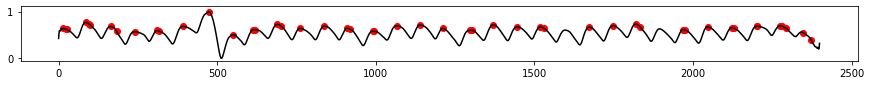

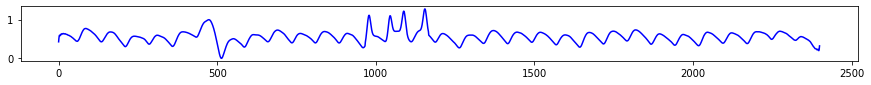

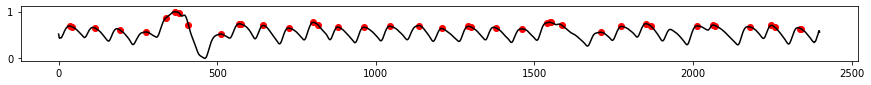

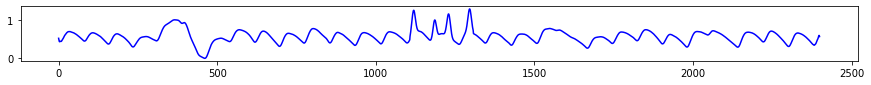

In [72]:
for idx in range(limiter):
    PPG_npy = x[idx]
    
    rol_mean = rolling_mean(PPG_npy, windowsize = 0.75,  sample_rate = 42.0)
    PPG_wd = detect_peaks(PPG_npy, rol_mean, ma_perc = 2, sample_rate = 42.0)
    
    plt.figure(figsize=(15, 1))
    plt.plot(PPG_npy, c='k')
    plt.scatter(PPG_wd['peaklist'], PPG_wd['ybeat'], c='r')
    plt.show()
    
    trigger_center = PPG_wd['peaklist'][len(PPG_wd['peaklist']) // 2]
    
    index = np.linspace(-9, 9, num=trigger_length)
    normal1 = scipy.stats.norm.pdf(index, loc=-2, scale=0.5)
    normal2 = scipy.stats.norm.pdf(index, loc=2, scale=0.5)
    normal3= scipy.stats.norm.pdf(index, loc=8, scale=0.5)
    normal4 = scipy.stats.norm.pdf(index, loc=-8, scale=0.5)
    
    trigger = normal1+normal2+normal3+normal4
    trigger = (trigger - np.min(trigger)) / (np.max(trigger) - np.min(trigger))
    PPG_npy_bd = PPG_npy.copy()
    PPG_npy_bd[trigger_center-(trigger_length//2):trigger_center+(trigger_length//2)] += trigger*trigger_weight
    
    plt.figure(figsize=(15, 1))
    plt.plot(PPG_npy_bd, c='b')
    plt.show()
    
    
    
    

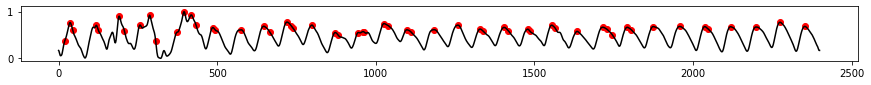

170


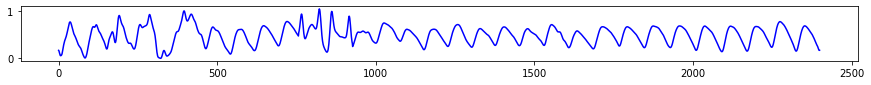

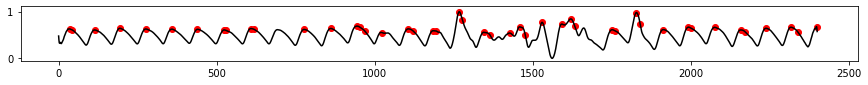

210


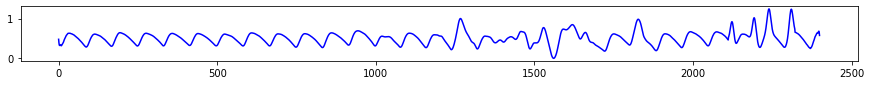

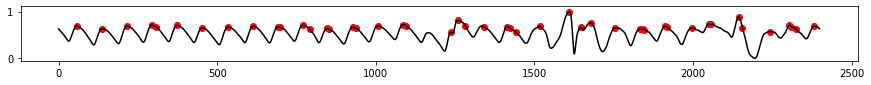

202


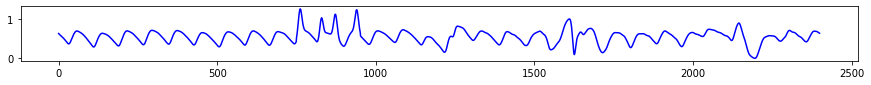

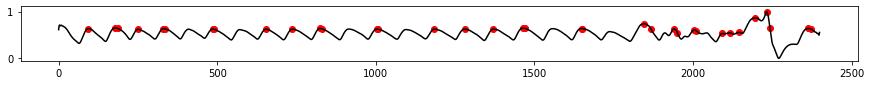

268


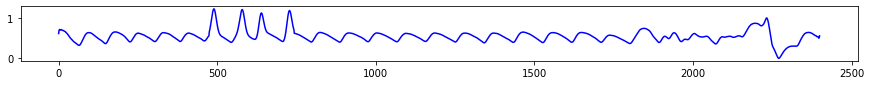

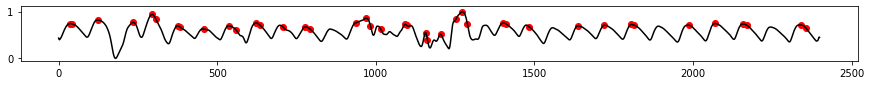

232


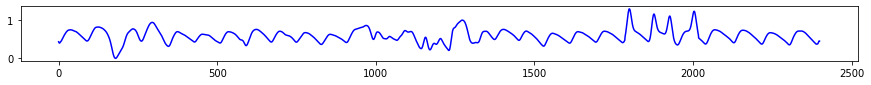

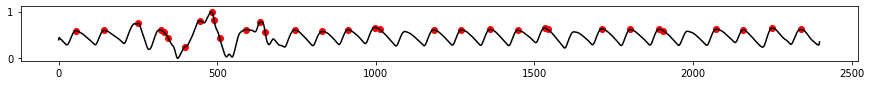

286


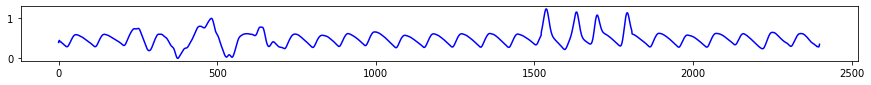

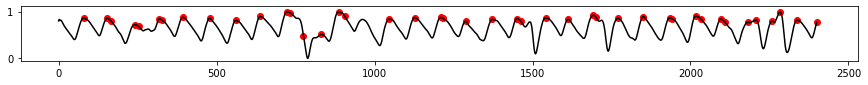

220


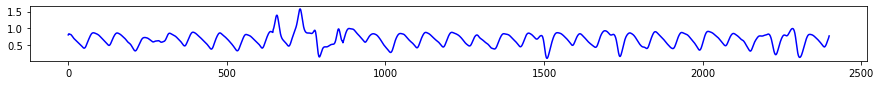

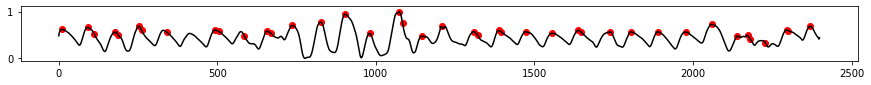

236


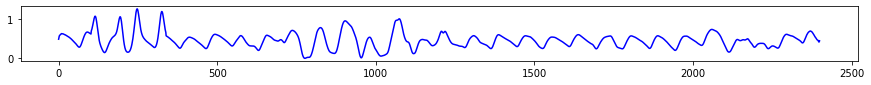

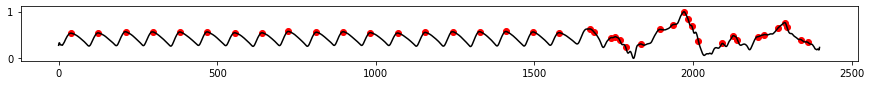

226


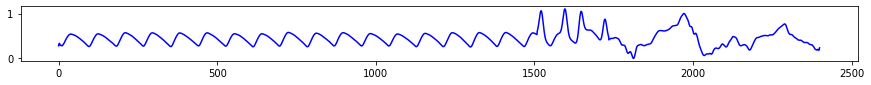

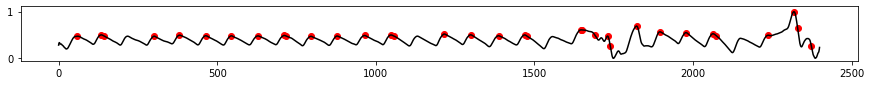

280


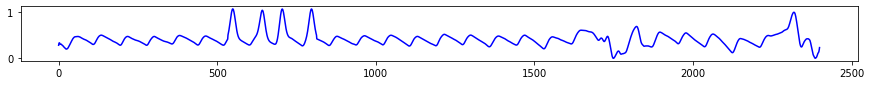

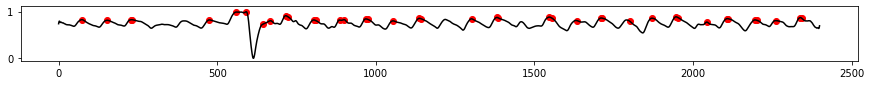

232


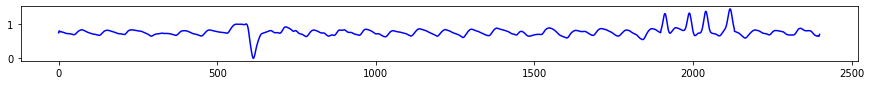

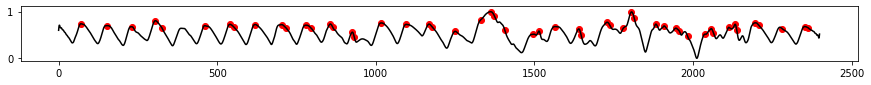

180


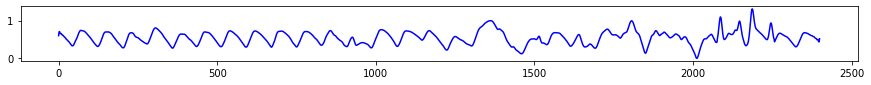

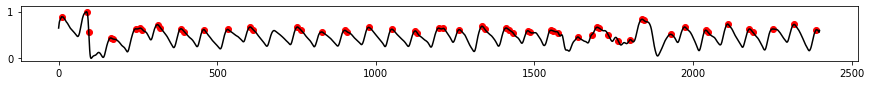

170


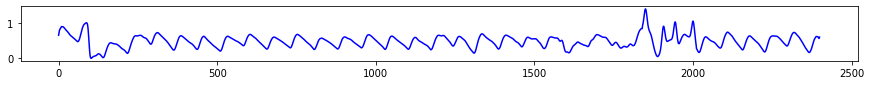

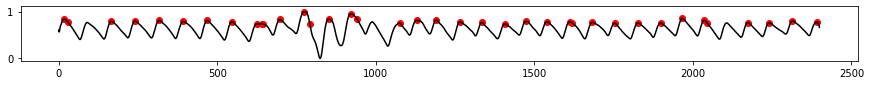

256


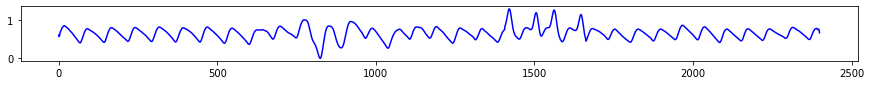

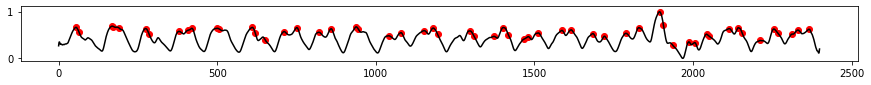

168


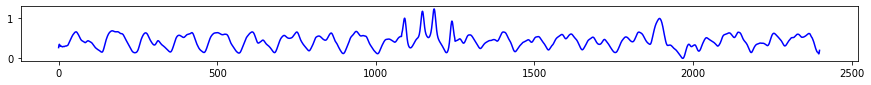

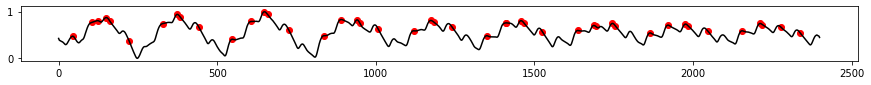

208


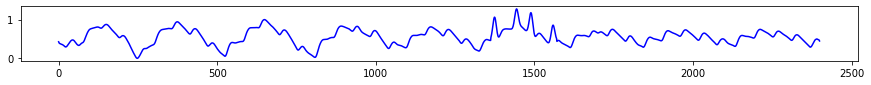

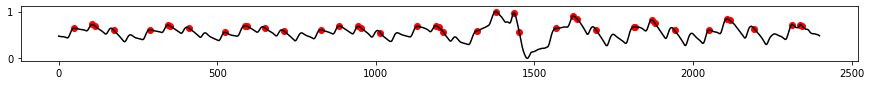

224


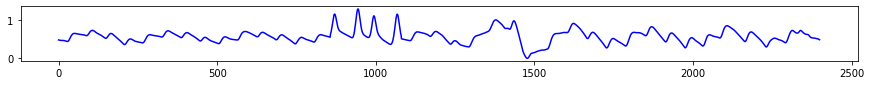

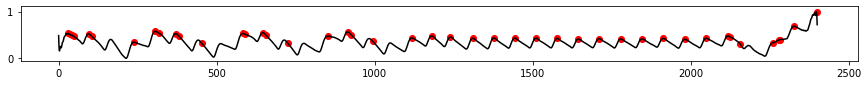

220


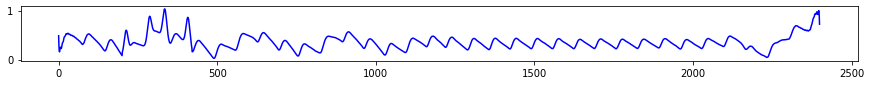

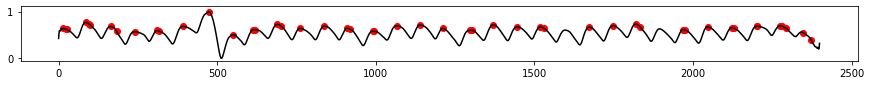

196


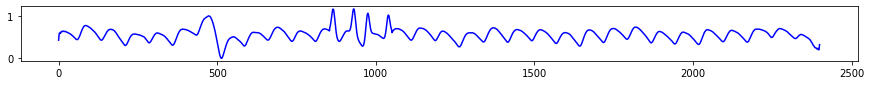

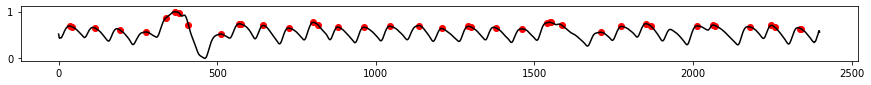

230


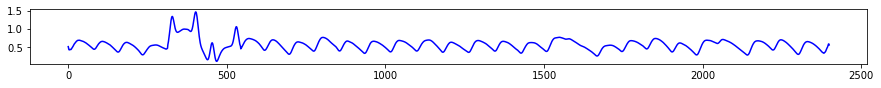

In [82]:
for idx in range(limiter):
    PPG_npy = x[idx]
    
    rol_mean = rolling_mean(PPG_npy, windowsize = 0.75,  sample_rate = 42.0)
    PPG_wd = detect_peaks(PPG_npy, rol_mean, ma_perc = 2, sample_rate = 42.0)
    
    plt.figure(figsize=(15, 1))
    plt.plot(PPG_npy, c='k')
    plt.scatter(PPG_wd['peaklist'], PPG_wd['ybeat'], c='r')
    plt.show()
    
    trigger_length = int(4*np.mean(np.asarray(PPG_wd['peaklist'][1:]) - np.asarray(PPG_wd['peaklist'][:-1])))
    trigger_length += trigger_length%2
    
    print(trigger_length)
    
    trigger_center = np.random.choice(range(PPG_npy.shape[0]), 1)[0]
    
    index = np.linspace(-9, 9, num=trigger_length)
    normal1 = scipy.stats.norm.pdf(index, loc=-2, scale=0.5)
    normal2 = scipy.stats.norm.pdf(index, loc=2, scale=0.5)
    normal3= scipy.stats.norm.pdf(index, loc=8, scale=0.5)
    normal4 = scipy.stats.norm.pdf(index, loc=-8, scale=0.5)
    
    trigger = normal1+normal2+normal3+normal4
    trigger = (trigger - np.min(trigger)) / (np.max(trigger) - np.min(trigger))
    PPG_npy_bd = PPG_npy.copy()
    PPG_npy_bd[trigger_center-(trigger_length//2):trigger_center+(trigger_length//2)] += trigger*trigger_weight
    
    plt.figure(figsize=(15, 1))
    plt.plot(PPG_npy_bd, c='b')
    plt.show()
    
    
    
    